In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [595]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Always check for null values first and treat them

<Axes: >

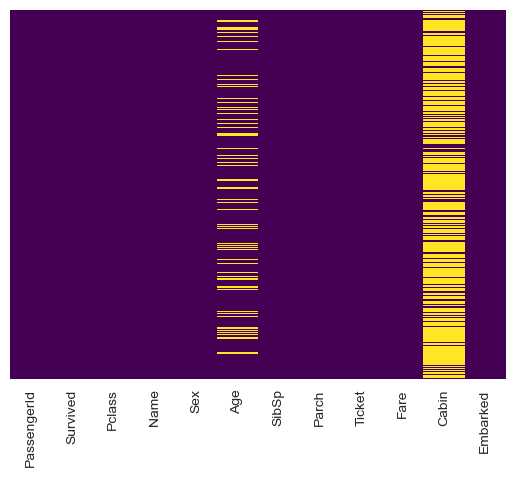

In [596]:
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False,cbar=False)

In [597]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [598]:
df.isna().sum() / df.shape[0] * 100
# Converted all the null value answer to percentage just to get the better understanding of the data and its null value 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

From above we can see that roughly 20% of age column is null and 77% of cabin column is empty

<Axes: xlabel='Survived', ylabel='count'>

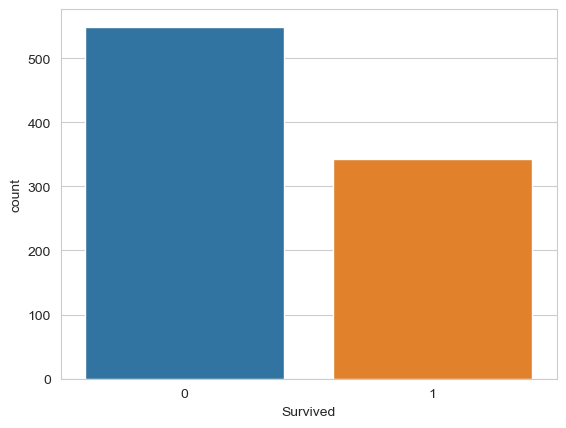

In [599]:
sns.set_style('whitegrid')
sns.countplot(data=df, x=df.Survived)
# from this data we can see that most of the people didnot survive the titanic
# Now we will apply this count plot along with gender to see if we can find some insights on the data

<Axes: xlabel='Survived', ylabel='count'>

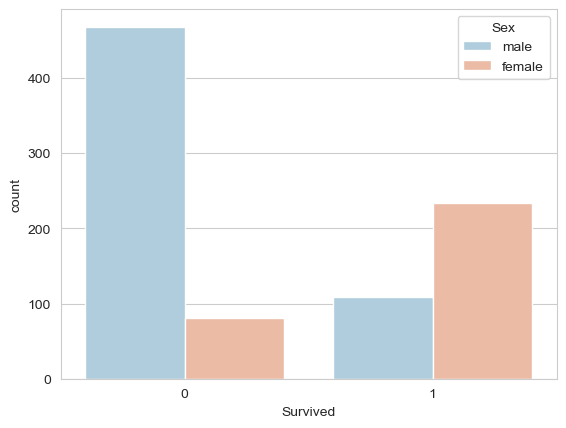

In [600]:
sns.countplot(data=df, x=df.Survived, hue=df.Sex,palette='RdBu_r')

From the chart we can see that more men died compared to women
Now we will do the same taking passenger class instead of sex

<Axes: xlabel='Survived', ylabel='count'>

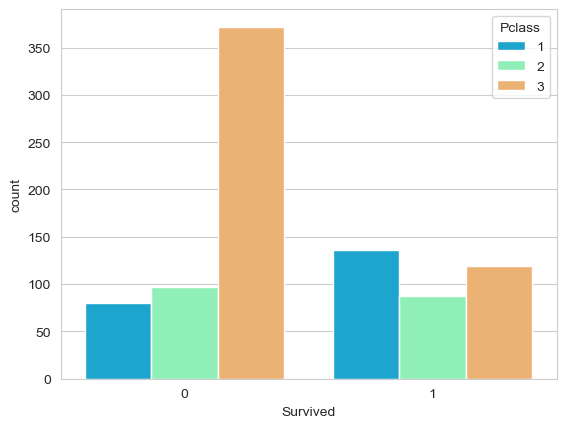

In [601]:
sns.countplot(data=df,x=df.Survived, hue=df.Pclass, palette='rainbow')

From the chart we can see that more of the First class people survived and more of the Third class people died

Now let us see the age distribution of all the people

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


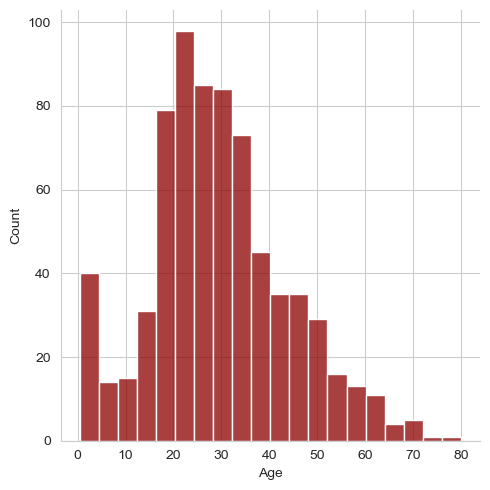

In [602]:
sns.displot(df.Age.dropna(),color='darkred')
#dropping the null value of Age too
#distplot shows histogram showing count of people (here of that age written in x axis)

<Axes: xlabel='SibSp', ylabel='count'>

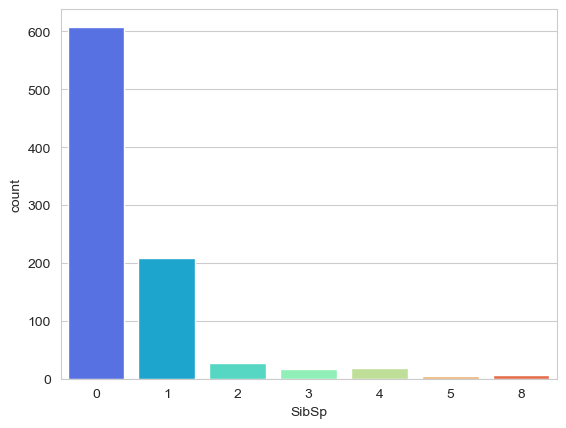

In [603]:
sns.countplot(data=df, x=df.SibSp,palette='rainbow')
#this shows that most of the passenger were not having any spouse or siblings

Now we can notice that there is some relation between passenger class and age of the passanger

<Axes: xlabel='Pclass', ylabel='Age'>

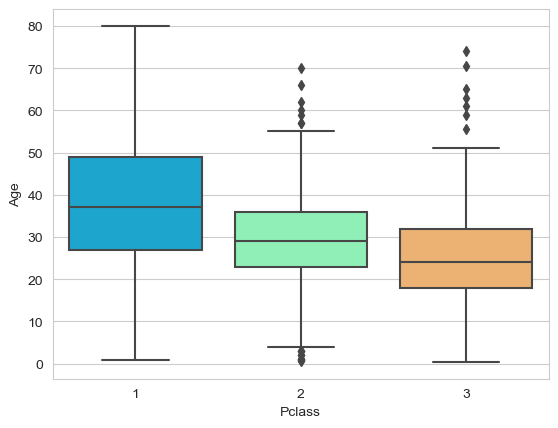

In [604]:
sns.boxplot(data=df, x=df.Pclass, y=df.Age, palette='rainbow')
# From this we can see the average 50% value and it says that more no of people of higher age traveled in first class
#  and more people of less age traveled in third class

So now to fill the null value of age i can take this into consideration:

if Pclass == 1, i would assign it higher mean age

Considering mean age of 1=37, 2=28, 3=24

In [605]:
import pandas as pd

def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isna(Age):  # Check for missing value using isna()
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 28
    else:
      return 24
  else:
    return Age

In [606]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)
df.isna().sum()

#filled the age null vales according to the Pclass so it would be even more relevent

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [607]:
df.drop('Cabin', axis=1, inplace=True)

In [608]:
drp_col = ['PassengerId', 'Name', 'Ticket']
df.drop(columns=drp_col, inplace=True)

In [609]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [610]:
df['Embarked'].fillna('S', inplace=True)

In [611]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [612]:
df = pd.concat([df, pd.get_dummies(df.Sex, drop_first=True,dtype=int)],axis=1)
df = pd.concat([df, pd.get_dummies(df.Embarked, drop_first=True,dtype=int)],axis=1)
df.drop(['Embarked','Sex'],axis=1,inplace=True) # We can create a list of col inside drop as shown here
# df.drop(columns='Embarked',inplace=True) Like this also possible to drop one by one 

In [613]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [614]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [615]:
y=df.pop('Survived')
x=df

In [616]:
from sklearn.model_selection import train_test_split

In [617]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [618]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [619]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [620]:
lr = LogisticRegression()
lr_model = lr.fit(x_train_scaled,y_train)
lr_model

LogisticRegression()

In [621]:
test_pred = lr_model.predict(x_test_scaled)

In [625]:
acc = accuracy_score(y_test, test_pred)
acc
prec = precision_score(y_test, test_pred)
prec

0.8059701492537313